# Task 5: <font color="#338CFF">Sales Prediction Using Python</font>

---

## Author: <font color="#b30000">Rajesh Patil</font>

## <font color="#b30000">Import Libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import plotly.express as px
import plotly.graph_objects as go
from warnings import filterwarnings
filterwarnings('ignore')
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## <font color="#b30000">Load the Dataset</font>

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [4]:
df.size

1000

In [5]:
df.shape

(200, 5)

## <font color="#b30000">Data Cleaning</font>

In [6]:
df = df.drop('Unnamed: 0', axis = 1)

In [7]:
df.sample(5)

TV  Radio  Newspaper  Sales
85   193.2   18.4       65.7   15.2
52   216.4   41.7       39.6   22.6
146  240.1    7.3        8.7   13.2
41   177.0   33.4       38.7   17.1
67   139.3   14.5       10.2   13.4

## <font color="#b30000">EDA - Exploratory Data Analysis</font>

In [8]:
# Check missing values in the dataset
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
# Check duplicate values in dataset
df.duplicated().sum()

0

In [10]:
df.size

800

In [11]:
df.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df[['Sales']].plot(kind = "hist", bins = 10)
plt.show()

In [14]:
figure = px.scatter(data_frame = df, x="TV",
                    y="Sales", size="TV", trendline="ols")
figure.show()

figure = px.scatter(data_frame = df, x="Newspaper",
                    y="Sales", size="Newspaper", trendline="ols")
figure.show()

figure = px.scatter(data_frame = df, x="Radio",
                    y="Sales", size="Radio", trendline="ols")
figure.show()

In [15]:
sns.pairplot(df, hue='Sales')

In [16]:
plt.figure(figsize=(5, 5))
plt.scatter(df['TV'],df['Sales'], c="lightseagreen", label="TV", marker = '*')
plt.scatter(df['Newspaper'],df['Sales'], c="lightcoral", label="Newspaper", marker = '^')
plt.scatter(df['Radio'],df['Sales'], c="royalblue", label="Radio", marker = '<')
plt.xlabel("Amount Spent")
plt.ylabel("Sales")
plt.title("Amount Spent vs Sales", fontsize=15)
plt.legend()
plt.show()

In [17]:
df['TV'].plot.hist(bins=10, color="lightseagreen", xlabel="TV")

<Axes: xlabel='TV', ylabel='Frequency'>

<Axes: xlabel='Newspaper', ylabel='Frequency'>

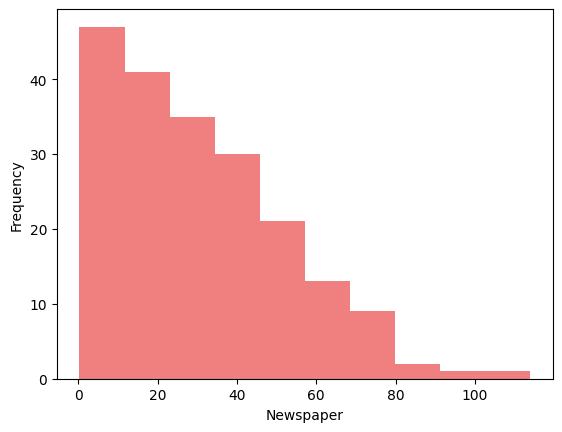

In [18]:
df['Newspaper'].plot.hist(bins=10, color="lightcoral", xlabel="Newspaper")

<Axes: xlabel='Radio', ylabel='Frequency'>

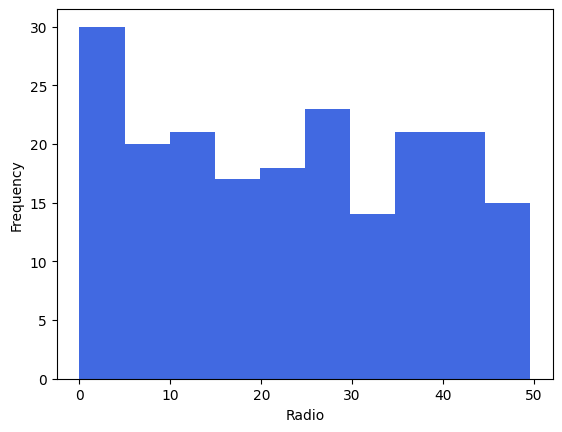

In [19]:
df['Radio'].plot.hist(bins=10,color="royalblue", xlabel="Radio")

In [20]:
featuresNumfinal = ['TV','Newspaper','Radio']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='mediumvioletred', orient='v')
    plt.tight_layout()

In [21]:
correlation = df.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


In [22]:
sns.heatmap(df.corr(), cmap="RdPu", annot = True)
plt.show()

## <font color="#b30000">Preprocessing</font>

In [23]:
# Feature Scaling
X = df.iloc[:,0:3]
y = df.iloc[:,3]

In [24]:
X

TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

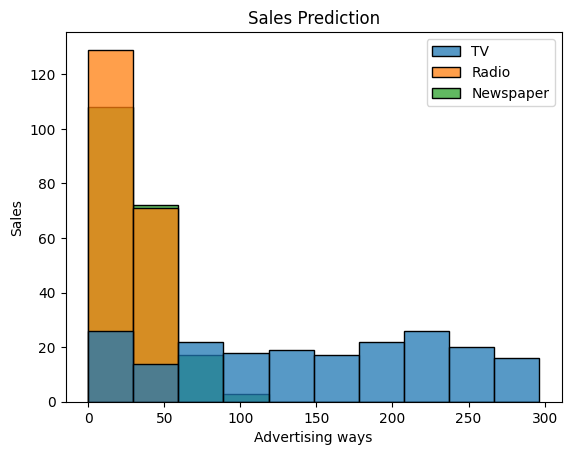

In [26]:
sns.histplot(X,bins = 10)
plt.ylabel('Sales')
plt.xlabel('Advertising ways')
plt.title("Sales Prediction")
plt.show()

## <font color="#b30000">Training and Testing</font>

In [27]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color="#b30000">Building Model</font>

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Create a dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the scores
    print(f'\033[1m{model_name} -\033[0m')
    print(f'\033[1mMean Squared Error:\033[0m {mse}')
    print(f'\033[1mR^2 Score:\033[0m {r2}')
    print('-'*50)

Linear Regression -
Mean Squared Error: 3.174097353976104
R^2 Score: 0.899438024100912
--------------------------------------------------
Lasso Regression -
Mean Squared Error: 3.143691505367937
R^2 Score: 0.9004013443377963
--------------------------------------------------
Ridge Regression -
Mean Squared Error: 3.174094812092732
R^2 Score: 0.89943810463304
--------------------------------------------------
Decision Tree -
Mean Squared Error: 2.4055
R^2 Score: 0.9237887795967467
--------------------------------------------------
Random Forest -
Mean Squared Error: 0.6177304249999997
R^2 Score: 0.9804290211725336
--------------------------------------------------
Gradient Boosting -
Mean Squared Error: 0.515557527162567
R^2 Score: 0.983666070117172
--------------------------------------------------


## <font color="#338CFF">Conclusion : </font>

## <font color="#b30000">Hyperparameter Tuning For A Gradient Boosting Model</font>

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Create the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("\033[1mBest Hyperparameters:\033[0m", grid_search.best_params_)

# Make predictions on the test set with the best model
y_pred_tuned = grid_search.best_estimator_.predict(X_test)

# Evaluate the model with tuned hyperparameters
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f'\n\033[1mTuned Gradient Boosting -\033[0m')
print(f'\033[1mMean Squared Error:\033[0m {mse_tuned}')
print(f'\033[1mR^2 Score:\033[0m {r2_tuned}')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 150}

Tuned Gradient Boosting -
Mean Squared Error: 0.5095189562774751
R^2 Score: 0.9838573845452097


## <font color="#b30000">Feature Importance Analysis</font>

In [30]:
# Extract feature importances from the tuned Gradient Boosting model
feature_importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("\033[1mFeature Importance:\033[0m")
print(feature_importance_df)

Feature Importance:
     Feature  Importance
0         TV    0.616093
1      Radio    0.377551
2  Newspaper    0.006356


## <font color="#b30000">Save the Tuned Model</font>

In [31]:
import joblib

best_model = grid_search.best_estimator_

# Save the model using joblib
joblib.dump(best_model, 'tuned_gradient_boosting_model.joblib')


['tuned_gradient_boosting_model.joblib']

## <font color="#b30000">Create a Gradio UI</font>

In [32]:
import gradio as gr

# Load the tuned Gradient Boosting model
loaded_model = joblib.load('tuned_gradient_boosting_model.joblib')

# Gradio UI
def predict_sales(tv, radio, newspaper):
    # Check for empty strings and set them to zero
    tv = 0.0 if tv == '' else float(tv)
    radio = 0.0 if radio == '' else float(radio)
    newspaper = 0.0 if newspaper == '' else float(newspaper)

    input_data = pd.DataFrame({'TV': [tv], 'Radio': [radio], 'Newspaper': [newspaper]})
    
    # Check if all inputs are zero, and if so, return a default prediction
    if all(value == 0.0 for value in [tv, radio, newspaper]):
        return 'Please enter values for advertising expenses.'

    prediction = loaded_model.predict(input_data)
    return f'Predicted Sales: $ {prediction[0]:,.2f}'

# Define labels for each input
tv_label = "TV Advertising Expense"
radio_label = "Radio Advertising Expense"
newspaper_label = "Newspaper Advertising Expense"

# Define app title and description
app_title = "Sales Prediction App"
app_description = "Predict sales based on advertising expenses using a tuned Gradient Boosting model."

iface = gr.Interface(
    fn=predict_sales,
    inputs=[
        gr.Textbox(label=tv_label),
        gr.Textbox(label=radio_label),
        gr.Textbox(label=newspaper_label)
    ],
    outputs=gr.Textbox(label="Predicted Sales"),
    live=True,
    title=app_title,
    description=app_description
)

iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
